In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
atmos = np.loadtxt('/Users/yuntse/data/dune/ae/boostedDM/CosSun_Atm_hA_BR.txt', delimiter = ' ')
m05_b1p1 = np.loadtxt('/Users/yuntse/data/dune/ae/boostedDM/CosSun_m05_b1p1.txt', delimiter = ' ')
m05_b10 = np.loadtxt('/Users/yuntse/data/dune/ae/boostedDM/CosSun_m05_b10.txt', delimiter = ' ')

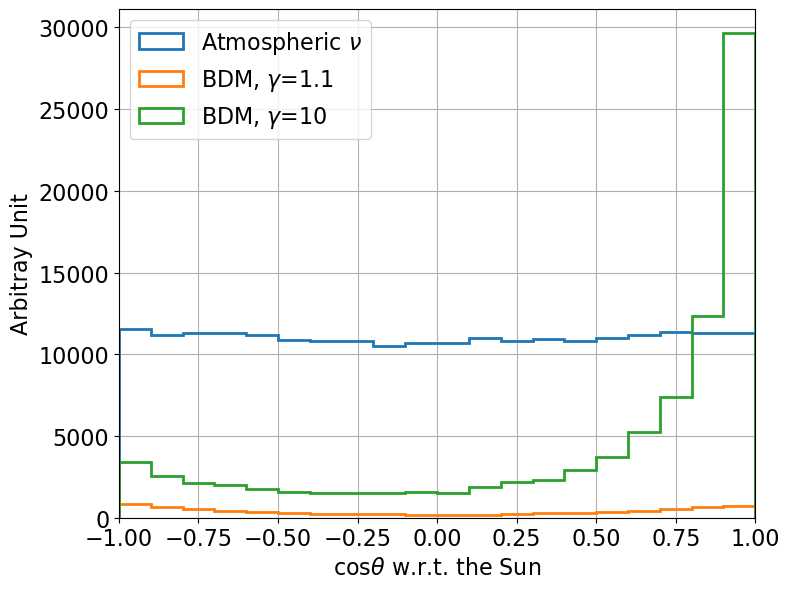

In [3]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.hist( atmos, bins = np.linspace(-1, 1, 21), histtype = 'step', lw = 2, label = r'Atmospheric $\nu$')
ax.hist( m05_b1p1, bins = np.linspace(-1, 1, 21), histtype = 'step', lw = 2, label = r'BDM, $\gamma$=1.1')
ax.hist( m05_b10, bins = np.linspace(-1, 1, 21), histtype = 'step', lw = 2, label = r'BDM, $\gamma$=10')

ax.set_xlabel( r'cos$\theta$ w.r.t. the Sun', fontsize = 16)
ax.set_ylabel( 'Arbitray Unit', fontsize = 16)
ax.tick_params( axis = 'x', labelsize = 16)
ax.tick_params( axis = 'y', labelsize = 16)

ax.set_xlim([ -1, 1 ])
ax.grid(':')
ax.legend(fontsize = 16)

In [4]:
atmos_noCut = float(atmos.size)
m05_b1p1_noCut = float(m05_b1p1.size)
m05_b10_noCut = float(m05_b10.size)
print(atmos_noCut, m05_b1p1_noCut, m05_b10_noCut)

220573.0 7795.0 88694.0


In [5]:
m05_b1p1[np.abs(m05_b1p1)>0.5].size

5498

In [6]:
nSimulatedEvtsAll_atm = 301000
BackgroundScale = 4 * 10 * 0.732 *2495.98 / nSimulatedEvtsAll_atm
BackgroundScale

0.24279832026578071

In [7]:
cuts = np.linspace(0, 0.95, 20)
cuts[1], cuts.size

(0.049999999999999996, 20)

In [8]:
atmos_cut = np.array([ float(atmos[np.abs(atmos)>cuts[icut]].size) for icut in range(0, 20) ])
m05_b1p1_cut = np.array( [ float(m05_b1p1[np.abs(m05_b1p1)>cuts[icut]].size) for icut in range(0, 20) ])
m05_b10_cut = np.array( [ float(m05_b10[np.abs(m05_b10)>cuts[icut]].size) for icut in range(0, 20)])

atmos_bkg = atmos_cut*BackgroundScale

m05_b1p1_eff = m05_b1p1_cut/m05_b1p1_noCut
m05_b1p1_fom = m05_b1p1_eff/np.sqrt(atmos_bkg)
    
m05_b10_eff = m05_b10_cut/m05_b10_noCut
m05_b10_fom = m05_b10_eff/np.sqrt(atmos_bkg)

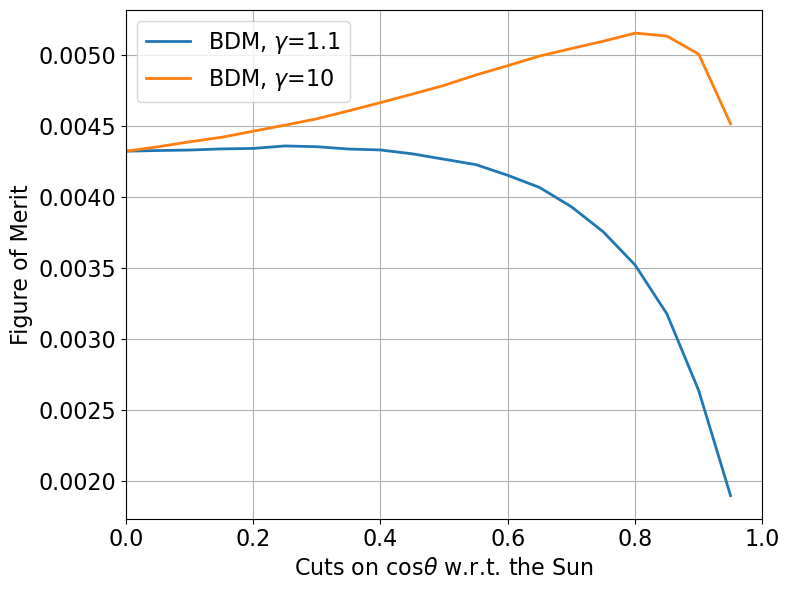

In [9]:
fig, ax = plt.subplots( figsize = (8, 6), layout = 'tight' )

ax.plot(cuts, m05_b1p1_fom, linestyle = '-', lw = 2, label = r'BDM, $\gamma$=1.1' )
ax.plot(cuts, m05_b10_fom, linestyle = '-', lw = 2, label = r'BDM, $\gamma$=10' )

ax.set_xlabel( r'Cuts on cos$\theta$ w.r.t. the Sun', fontsize = 16)
ax.set_ylabel( 'Figure of Merit', fontsize = 16)
ax.tick_params( axis = 'x', labelsize = 16)
ax.tick_params( axis = 'y', labelsize = 16)

ax.set_xlim([ 0, 1 ])
ax.grid(':')
ax.legend(fontsize = 16)